# Unsupervised Challenge
___

### 1. Apply dimensionality reduction techniques to visualize the observations.
### 2. Apply clustering techniques to group together similar observations.

In each of the tasks above, try alternative methods and select a best performing one. Discuss how dimensionality reduction and clustering algorithms enable you to gain insights regarding the data.

In [46]:
# Maths and Data
import numpy as np
import pandas as pd
import time

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Decomp
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# ML
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import silhouette_score, adjusted_rand_score


sns.set_style('white')

In [64]:
# fetching data
redwine = pd.read_csv('https://raw.githubusercontent.com/dancassin/DATA/master/winequality-red.csv')
redwine['type'] = 0
whitewine = pd.read_csv('https://raw.githubusercontent.com/dancassin/DATA/master/winequality-white.csv')
whitewine['type'] = 1

wines = pd.concat([redwine, whitewine])

wines.info()
wines.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
2      9.8        5     0  
3      9.8        6     0  
4      9.4        5     0

In [69]:
X = wines.iloc[:,:12]
Y = wines.iloc[:,12]

print(X.shape, Y.shape)

(6497, 12) (6497,)


In [121]:
# scaling and normalizing
X_std = StandardScaler().fit_transform(X)
X_norm = normalize(X_std)

# PCA
pca_fit = PCA(n_components=2).fit(X_std)
pca = PCA(n_components=2).fit_transform(X_std)

# make list of hyperparams
h_affinity = ['euclidean','manhattan','cosine']
h_linkage = ['complete','average','ward']




K = 2


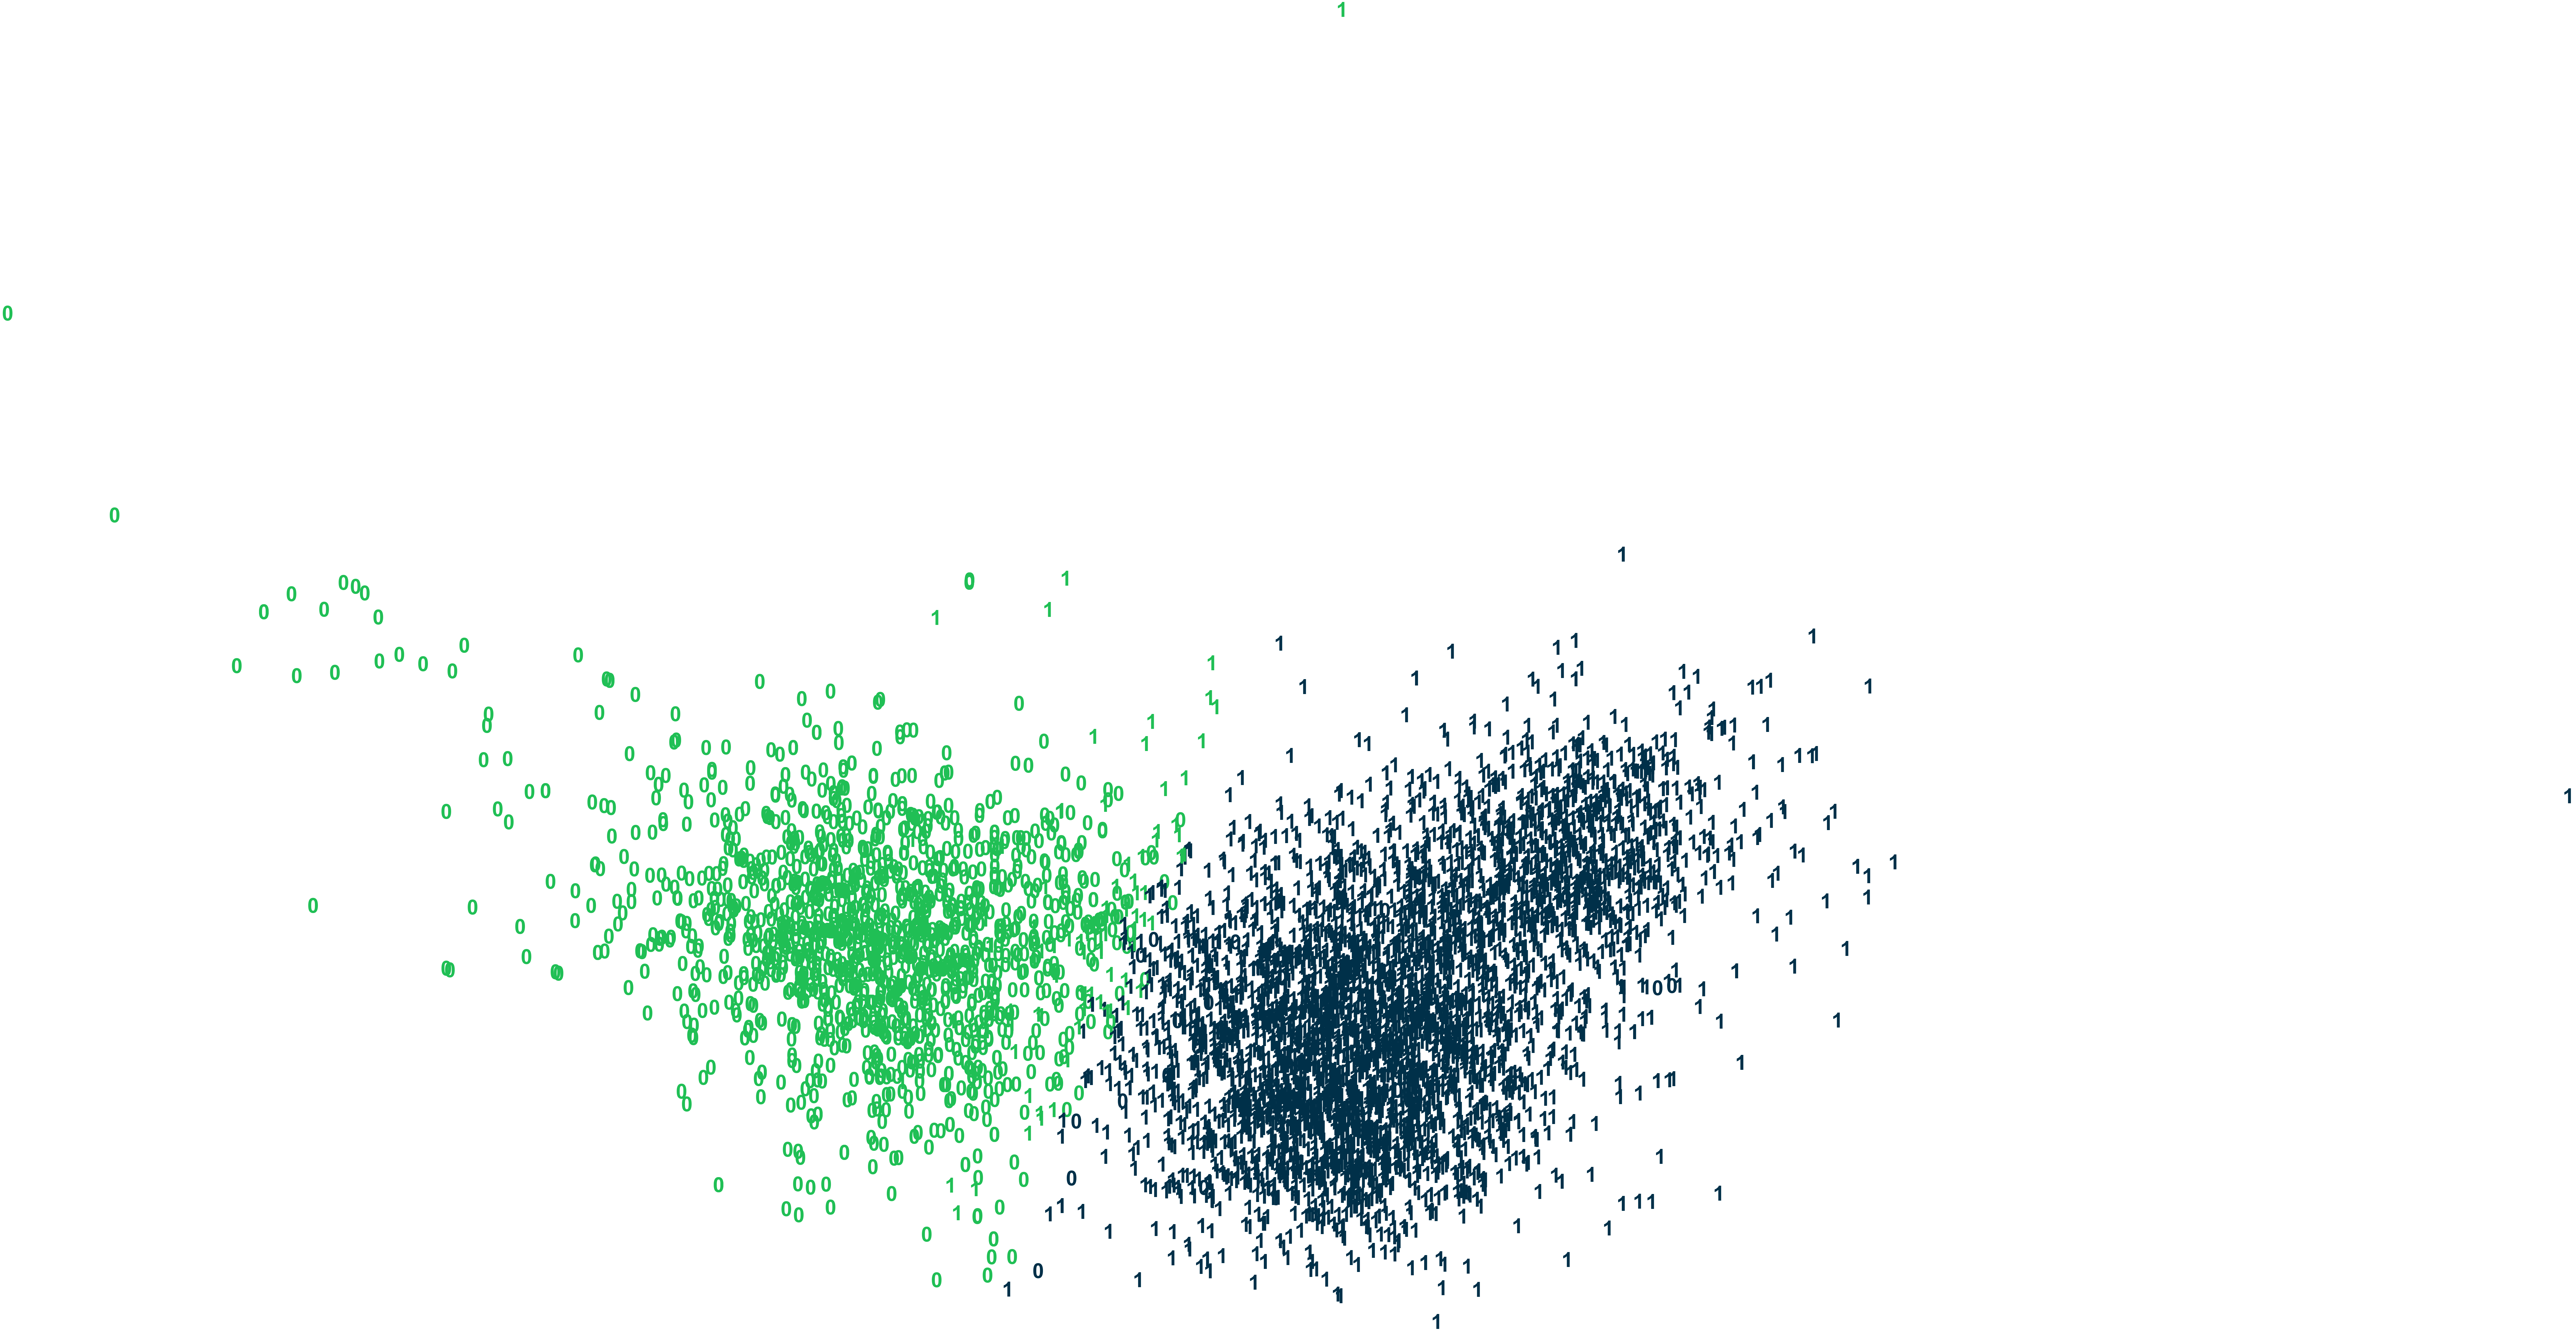



K = 3


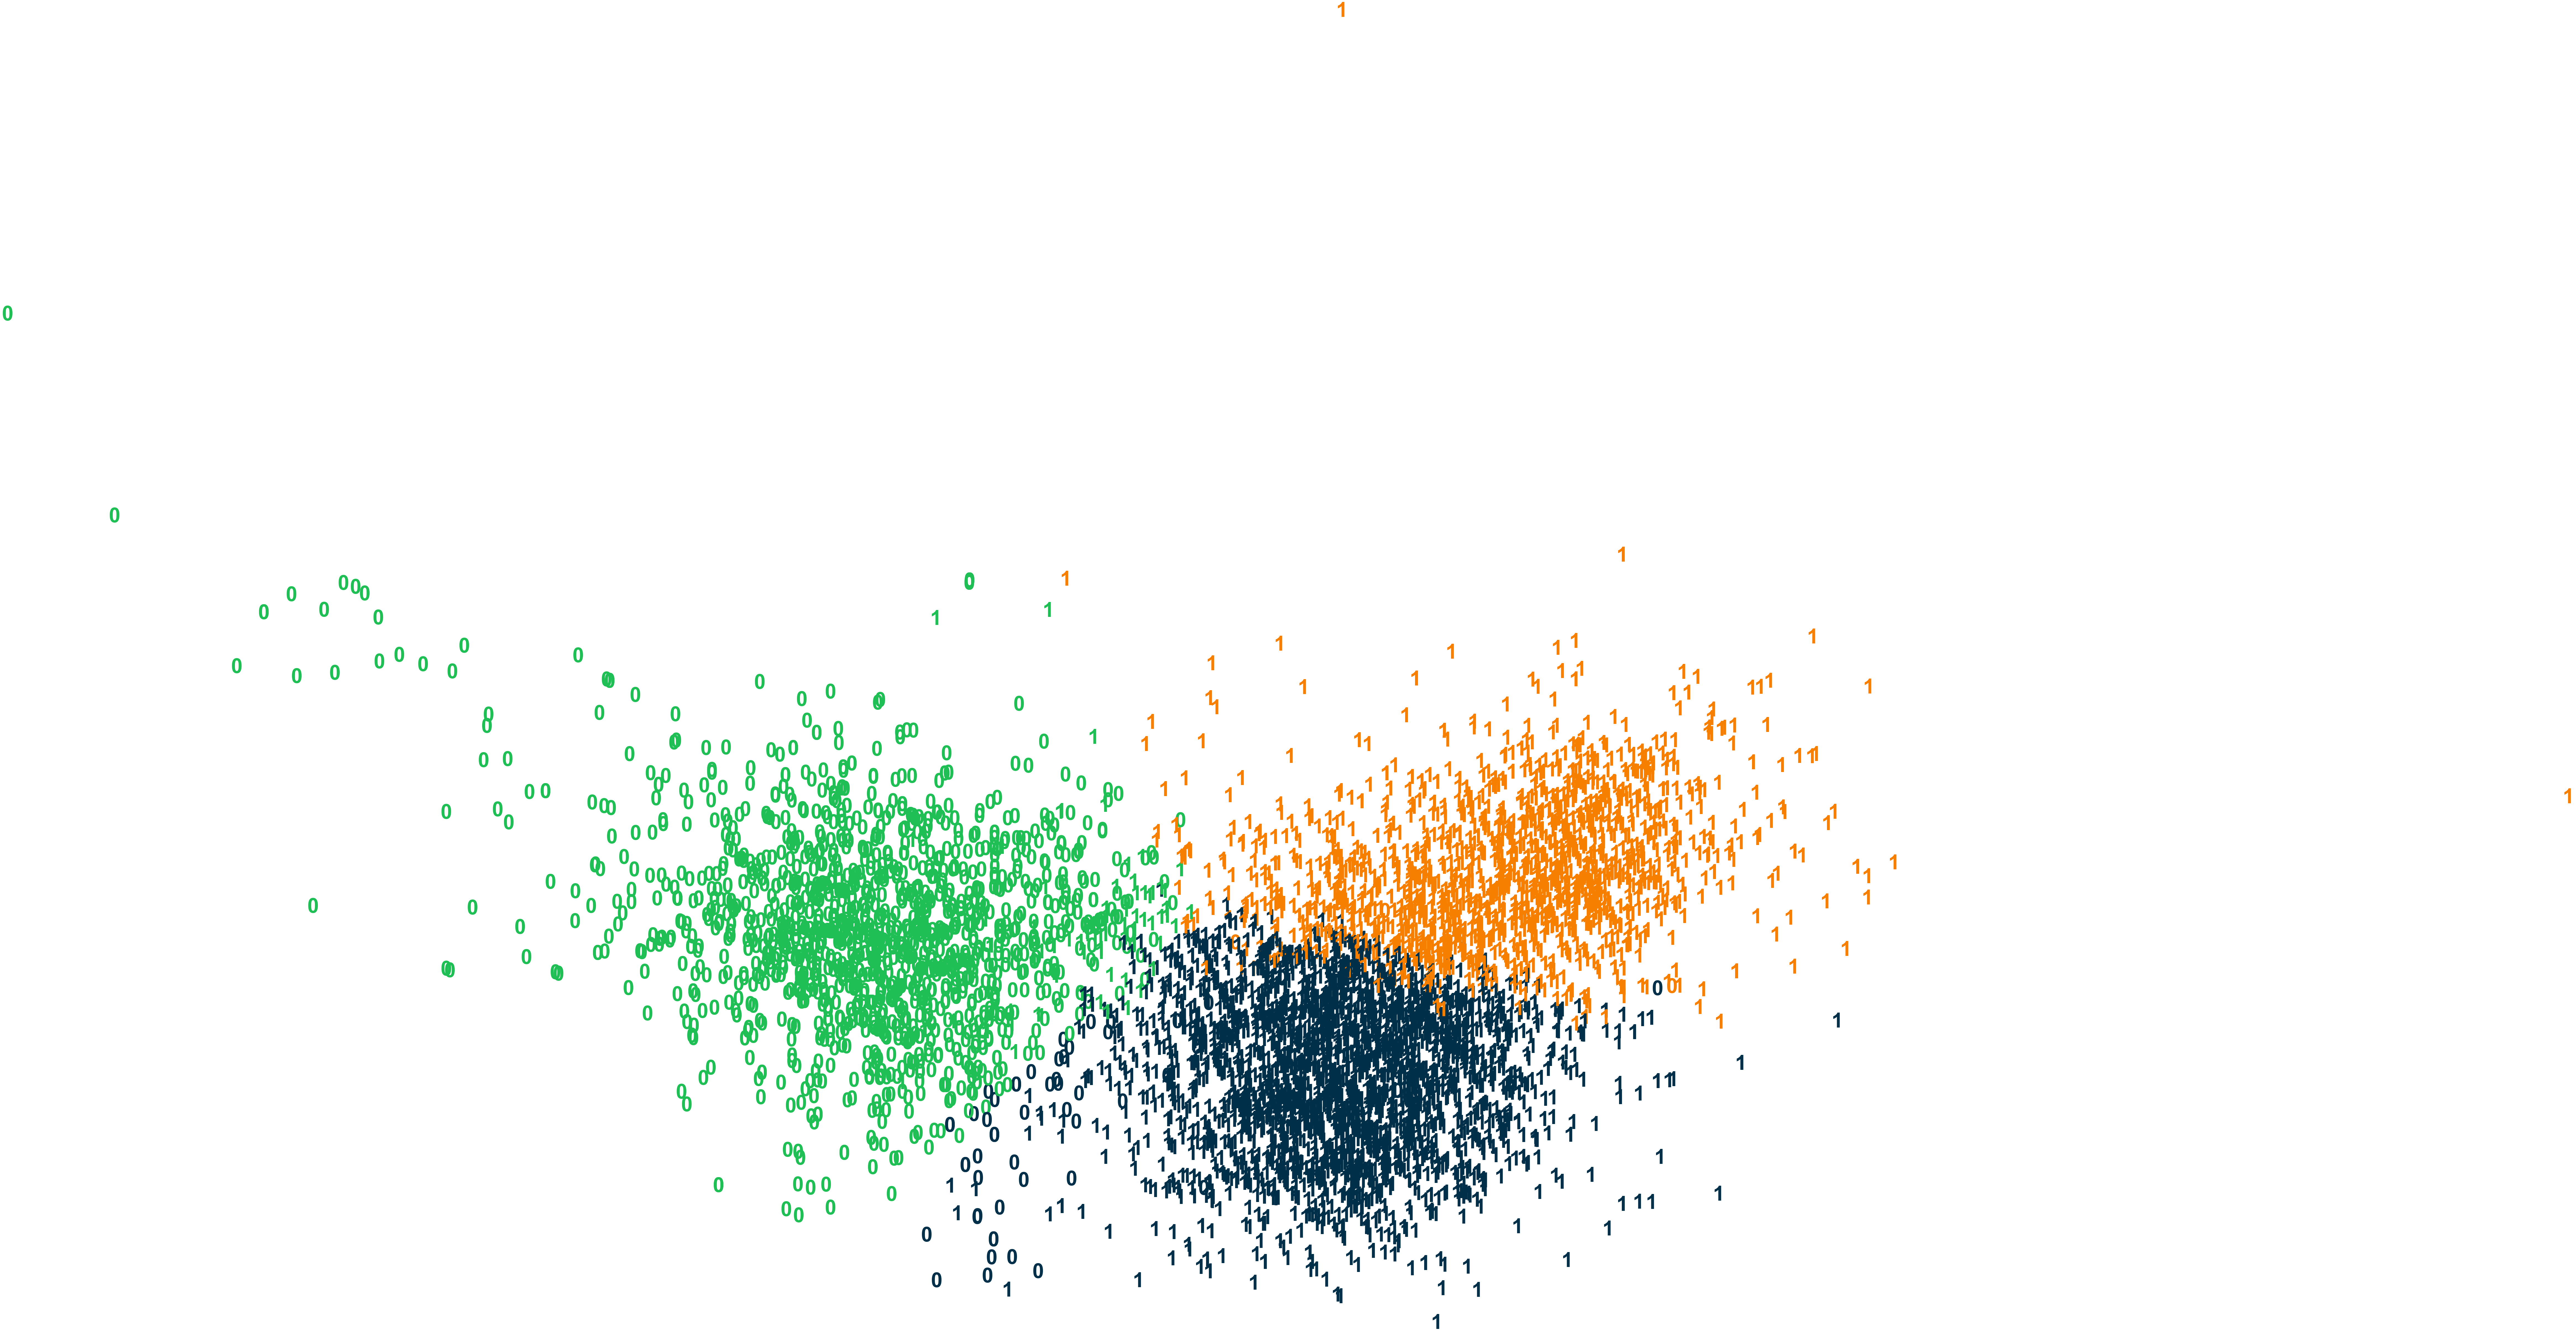



K = 4


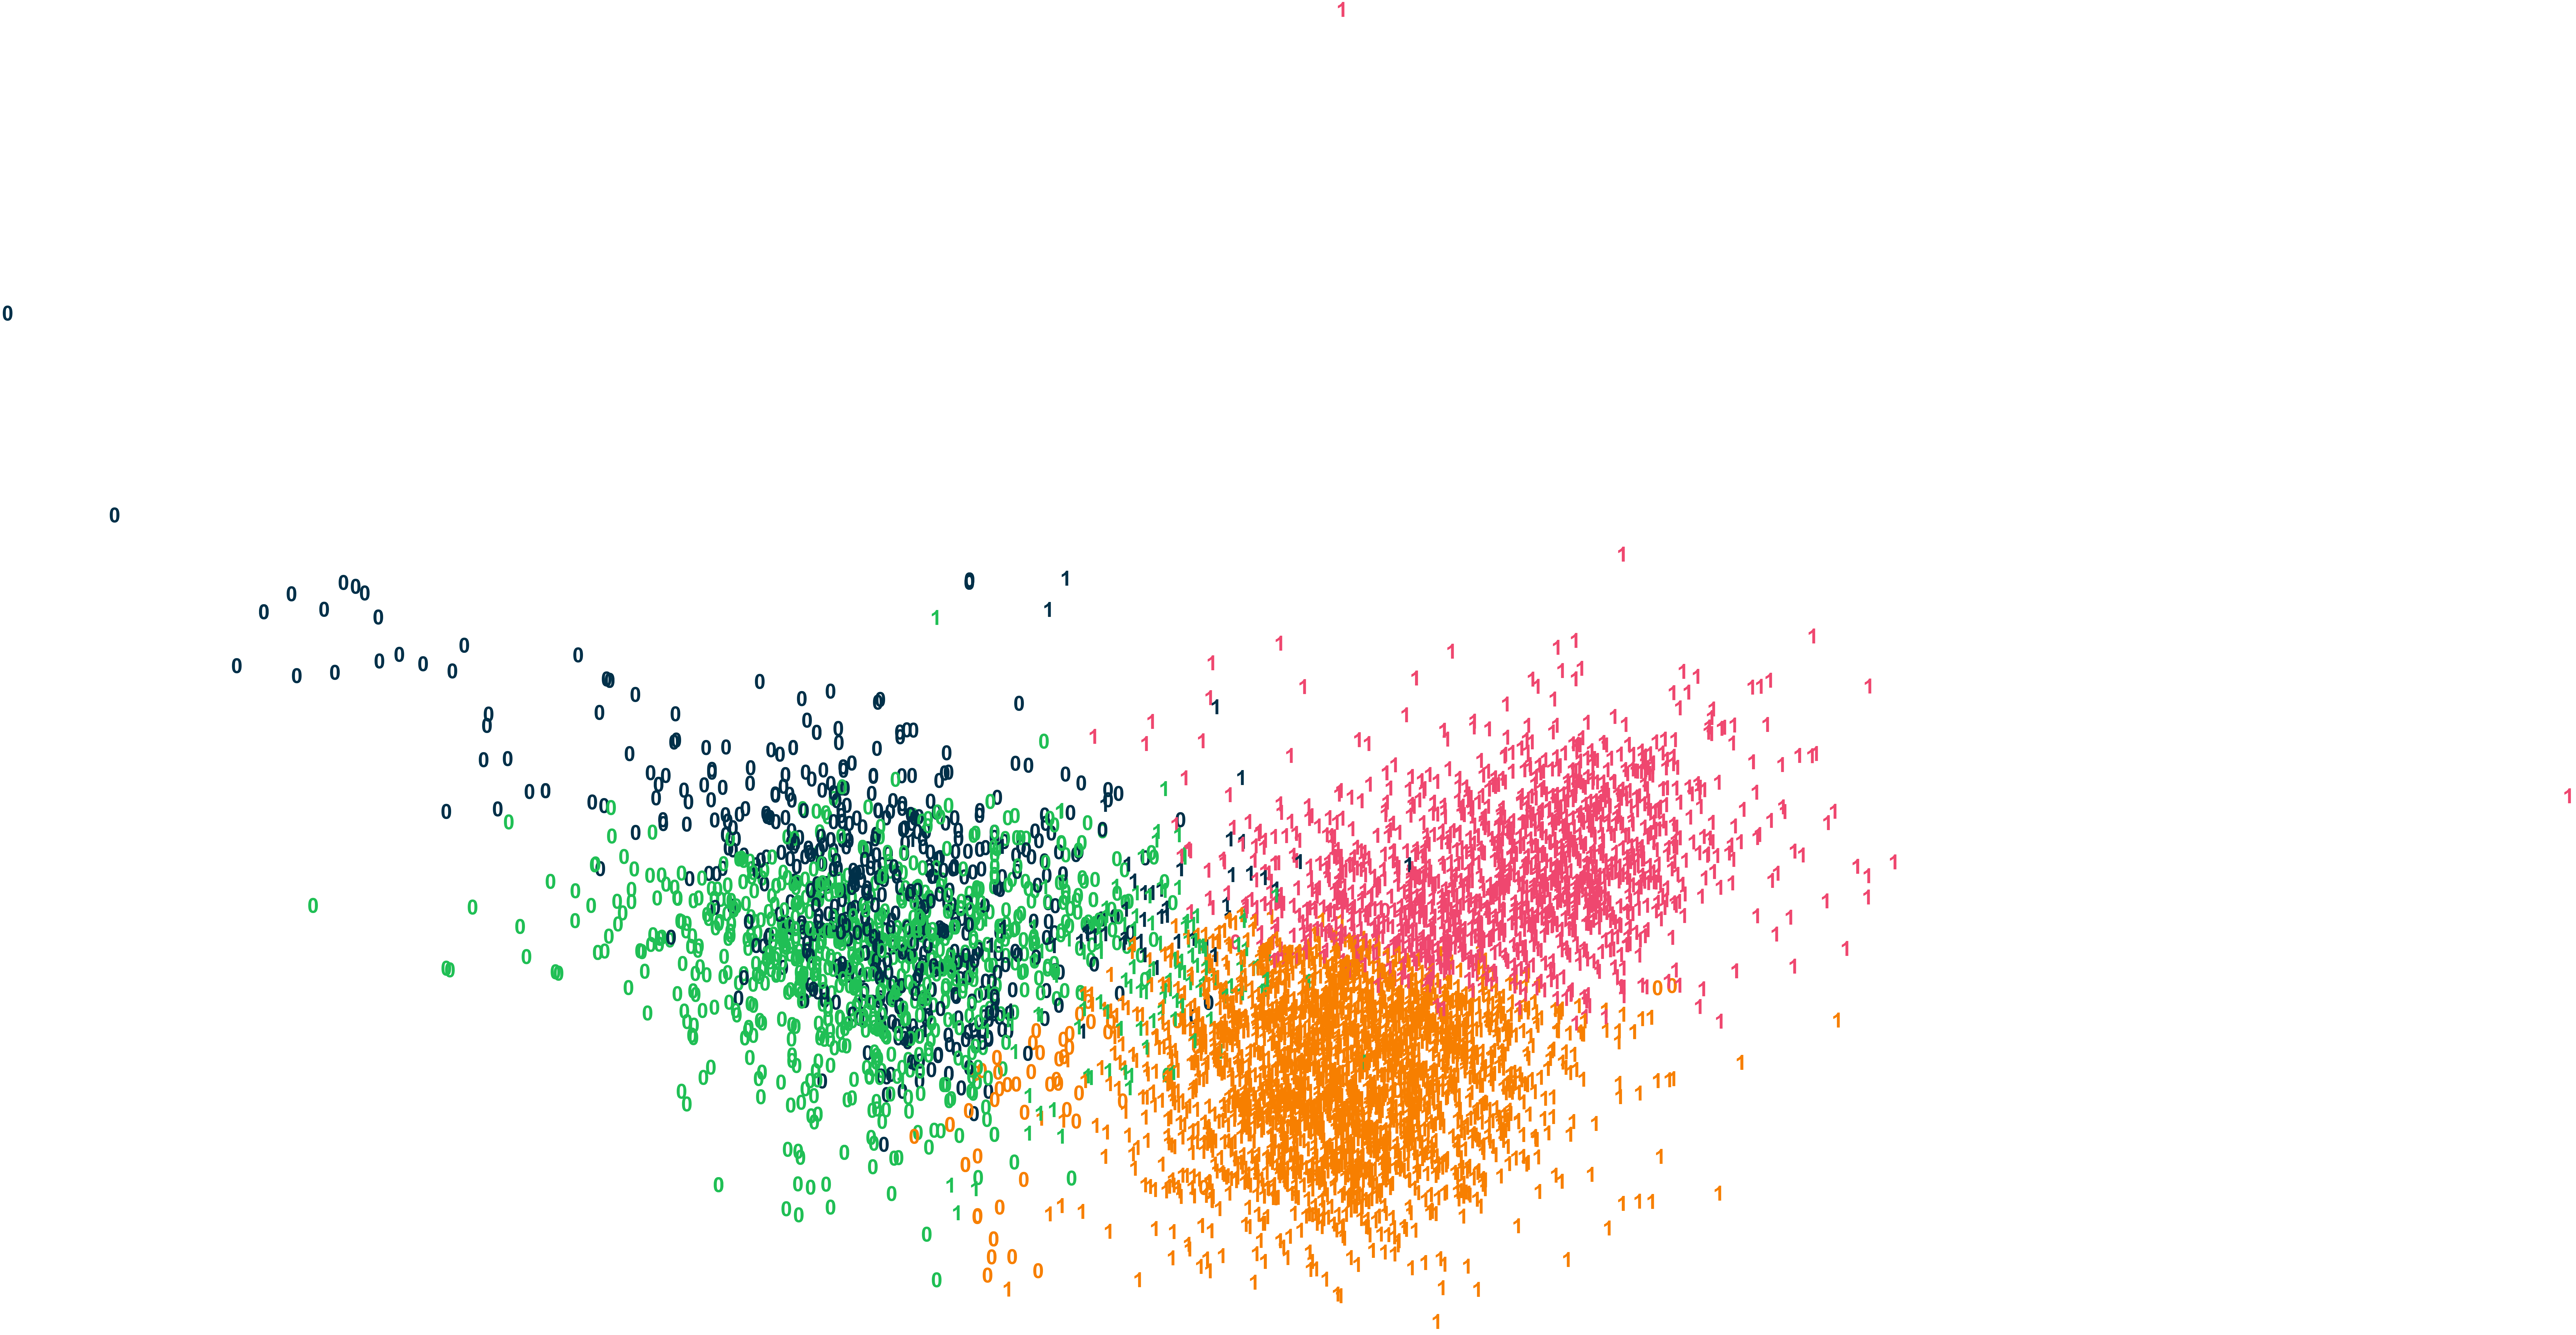

In [107]:
# Running K Means where numbers represent ground truths and colors represent K-means clusters
for k in range(2,5):
    print(f'K = {k}')
    kmeans = KMeans(n_clusters=k).fit(X_std)
    kmeans_clusters = kmeans.predict(X_std)
    plt.figure(figsize=(10,5))
    colors = ['#20BF55', '#003049', '#F77F00', '#ef476f']
    for i in range(pca.shape[0]):
        plt.text(pca[i, 0], pca[i, 1], str(Y.values[i]),
                 color=colors[int(kmeans_clusters[i])],
                 fontdict={'weight': 'bold', 'size': 75}
            )

    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.show()
    print('\n')

There is a slight bit of overlap in clusters where k=2, but there is a good separation between the reds (0's) and whites (1's), and K at 3 and 4 show us an interesting separation in the whites.

In [ ]:
# Let's see how PCA is weighting the columns 
pca_df = pd.DataFrame()

pca_df['columns'] = X.columns
pca_df['pca_1'] = pca_fit.components_[0]
pca_df['pca_2'] = pca_fit.components_[1]

In [133]:
pca_df[['columns', 'pca_1']].sort_values(by='pca_1', ascending=False)

columns     pca_1
6   total sulfur dioxide  0.474420
5    free sulfur dioxide  0.422691
3         residual sugar  0.318905
2            citric acid  0.146461
11               quality  0.087476
10               alcohol -0.058924
7                density -0.092438
8                     pH -0.208070
0          fixed acidity -0.256929
9              sulphates -0.299852
4              chlorides -0.313450
1       volatile acidity -0.394931

In [134]:
pca_df[['columns', 'pca_2']].sort_values(by='pca_2', ascending=False)

columns     pca_2
7                density  0.554920
3         residual sugar  0.342585
4              chlorides  0.269770
0          fixed acidity  0.261843
2            citric acid  0.144093
6   total sulfur dioxide  0.143948
9              sulphates  0.119634
5    free sulfur dioxide  0.111179
1       volatile acidity  0.105198
8                     pH -0.152922
11               quality -0.296601
10               alcohol -0.492727

This makes sense as red wines are typically denser than white wines and have less sulfur dioxide

In [92]:
# K-means metrics
pd.crosstab(Y, kmeans_clusters)

col_0     0     1
type             
0        25  1574
1      4804    94

In [96]:
print(f'Silhouette Score: {silhouette_score(X_std,kmeans_clusters, metric="euclidean")}')
print(f'ARI Score: {adjusted_rand_score(Y,kmeans_clusters)}')

Silhouette Score: 0.25568536958165466
ARI Score: 0.9233952720291152


K-means seems to perform well in the above metrics. This makes sense as distributions are generally isotropic.

In [108]:
# Heirarchical Clustering
for i in range(len(h_linkage)):
    try:
        for j in range(len(h_affinity)):
            results = AgglomerativeClustering(linkage=h_linkage[i],
                                              affinity=h_affinity[j],
                                              n_clusters=2                     
                                             ).fit_predict(X_norm)
            silhouette = silhouette_score(X_std,results, metric='euclidean')
            ARI = adjusted_rand_score(Y,results)
            print(('_'*30) + f'\nHierarchy Pair: {h_affinity[j]}, {h_linkage[i]}\n')
            print(f'Silhouette Score: {silhouette}')
            print(f'ARI Score: {ARI}')
    except ValueError:
        break

______________________________
Hierarchy Pair: euclidean, complete

Silhouette Score: 0.11345101760539088
ARI Score: 0.002183998715926328
______________________________
Hierarchy Pair: manhattan, complete

Silhouette Score: 0.13826352171660825
ARI Score: 0.2535960070367205
______________________________
Hierarchy Pair: cosine, complete

Silhouette Score: 0.11345101760539088
ARI Score: 0.002183998715926328
______________________________
Hierarchy Pair: euclidean, average

Silhouette Score: 0.24337345191749923
ARI Score: 0.866733474688951
______________________________
Hierarchy Pair: manhattan, average

Silhouette Score: 0.24543158629727835
ARI Score: 0.8935821144246816
______________________________
Hierarchy Pair: cosine, average

Silhouette Score: 0.2530117323271656
ARI Score: 0.9478297568280918
______________________________
Hierarchy Pair: euclidean, ward

Silhouette Score: 0.23570107806081964
ARI Score: 0.9405539329287785


Overall, average seems to perform the best with ward also scoring highly, let's check the dendrogram

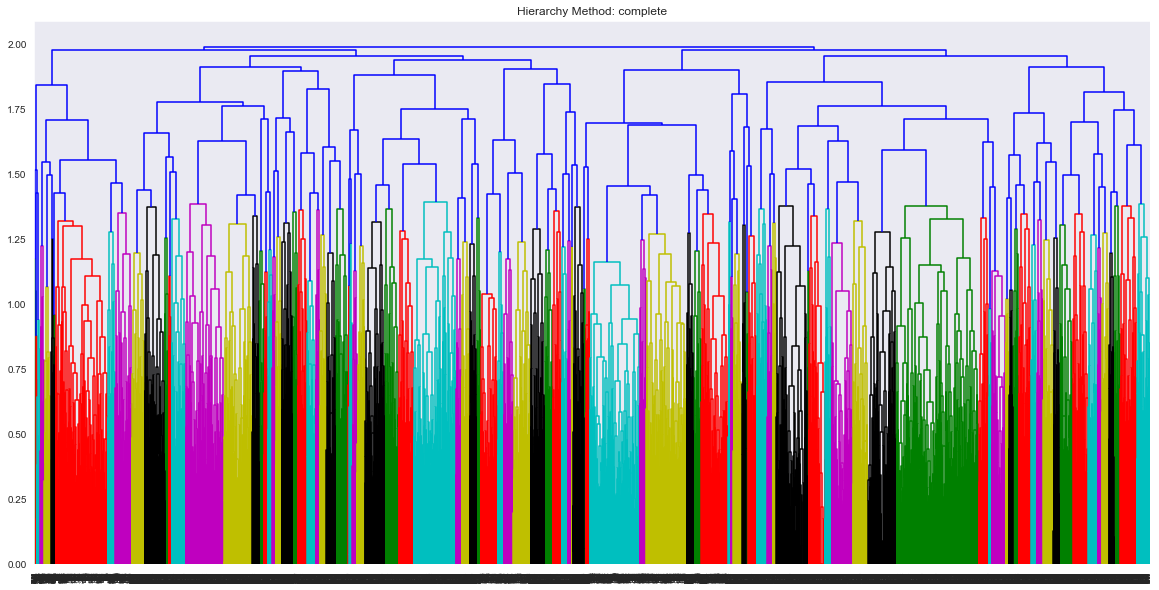

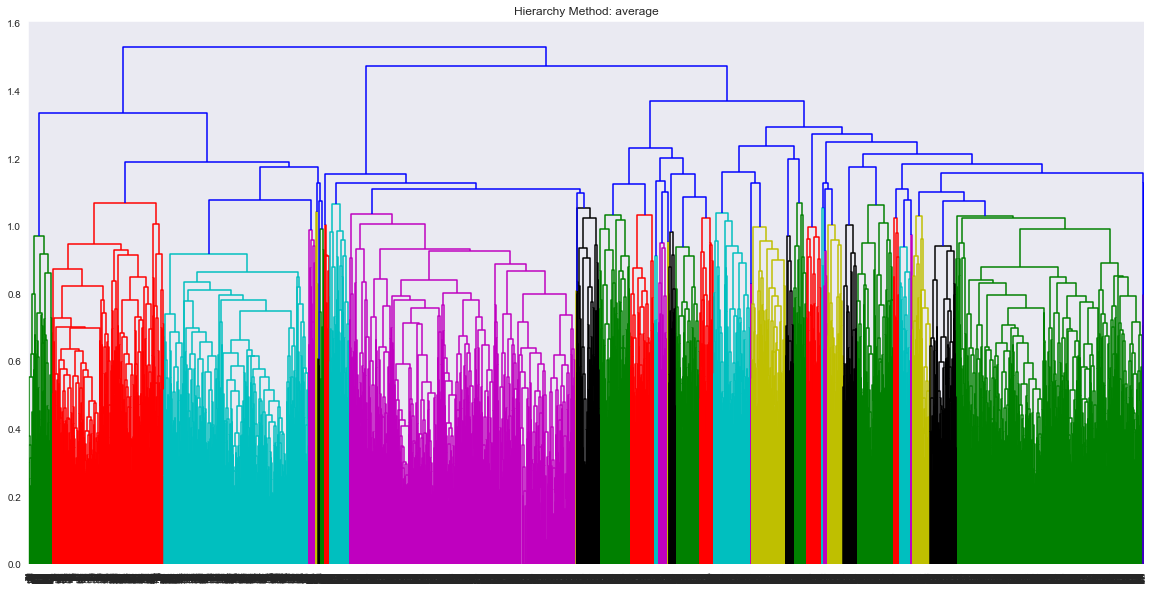

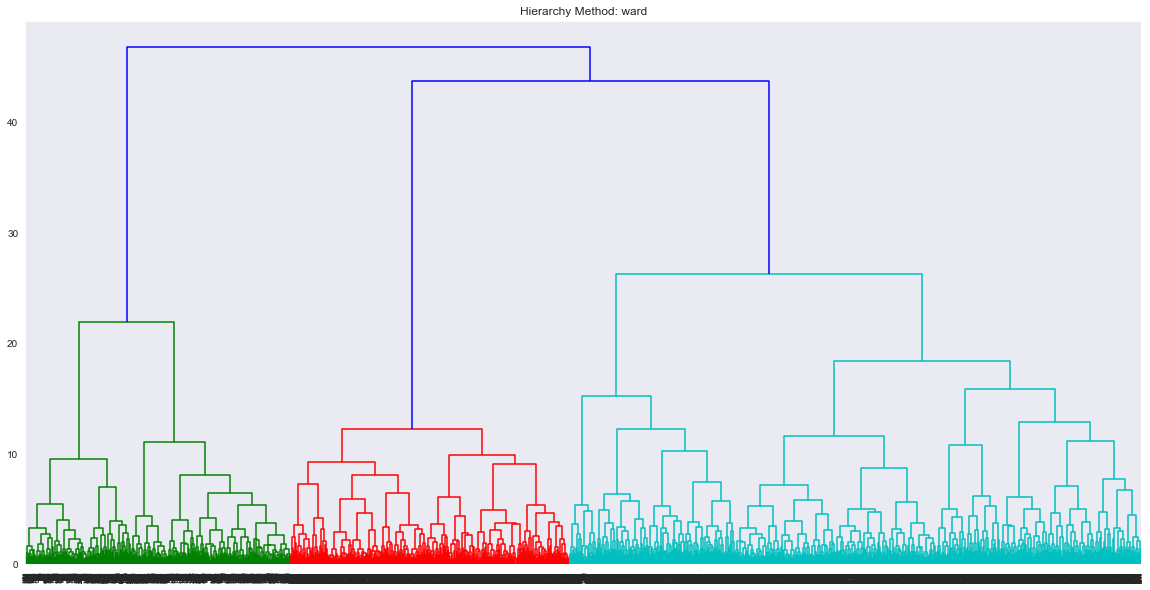

In [110]:

for i in h_linkage:
    plt.figure(figsize=(20,10))
    dendrogram(linkage(X_norm, method=i))
    plt.title(f'Hierarchy Method: {i}')
    plt.show()

Looks like hierarchical model is picking up the two main classifications - red / white wines - for all methods, and it is finding an interesting subdivision of the whites (the whites being the larger of the two groups). We can see from the ARI, that average and ward perform best, and from the dendrogram, ward seems to be the easiest to grasp, but average may be picking up on more nuances in the data such as the quality of the wine and possibly even the type of grape (but we do not have the latter data to verify)

UMAP neighbors: 3, dist: 0.3


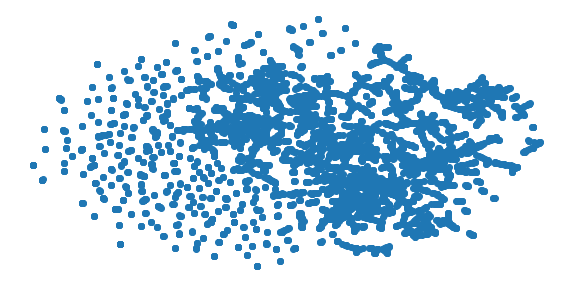



UMAP neighbors: 3, dist: 0.5


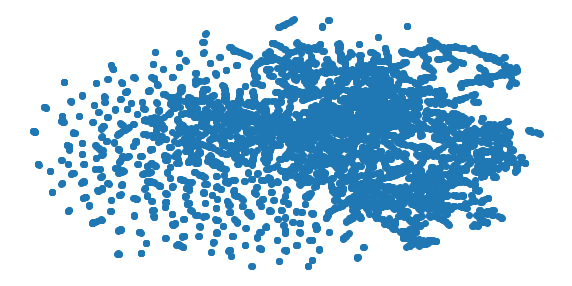



UMAP neighbors: 3, dist: 1.0


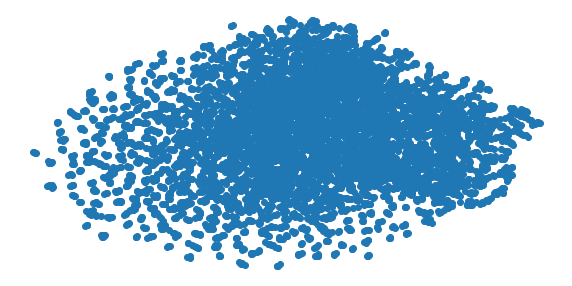



UMAP neighbors: 5, dist: 0.3


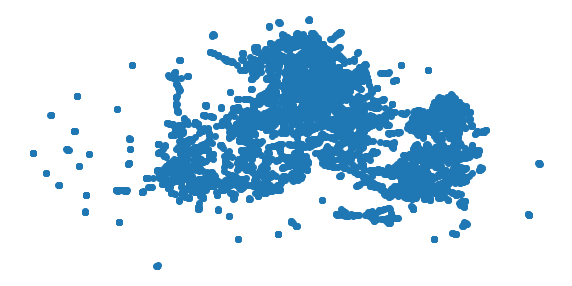



UMAP neighbors: 5, dist: 0.5


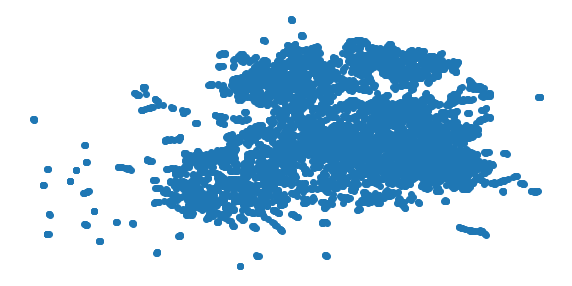

/Users/DanCassin/Development/python/python/lib/python3.8/site-packages/umap/spectral.py:227: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


UMAP neighbors: 5, dist: 1.0


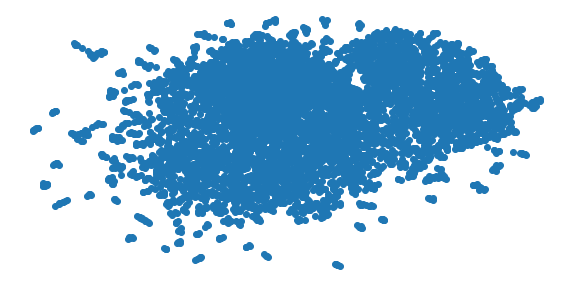



UMAP neighbors: 7, dist: 0.3


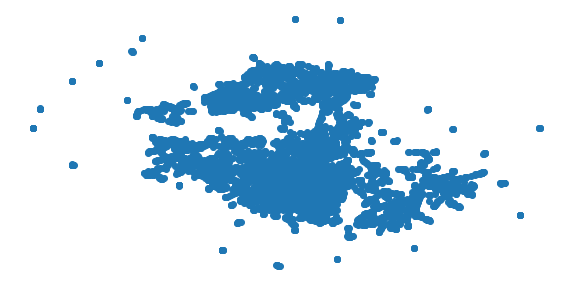



UMAP neighbors: 7, dist: 0.5


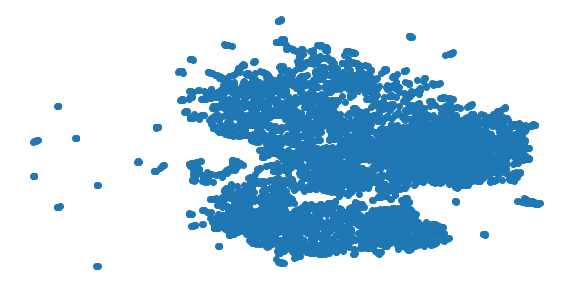



UMAP neighbors: 7, dist: 1.0


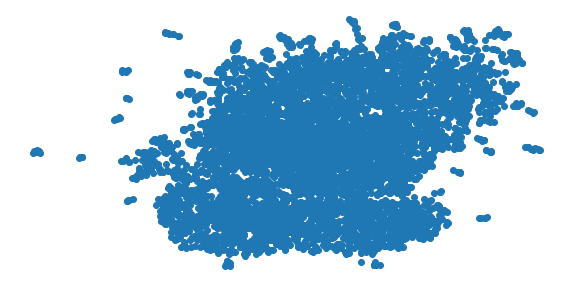

In [97]:
# UMAP
neighbors = [3,5,7]
dist = [0.3, 0.5, 1.0]

for i in neighbors:
    for j in dist:
        umap_results = umap.UMAP(n_neighbors=i, 
                                 min_dist=j, 
                                 metric='correlation').fit_transform(X_std)

        print(f'UMAP neighbors: {i}, dist: {j}')
        plt.figure(figsize=(10,5))
        plt.scatter(umap_results[:, 0], umap_results[:, 1])
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.show()
        print('\n')



Selections 7/.5 and 5/.5 seem to have the best separation, but they do not look as good as k-means

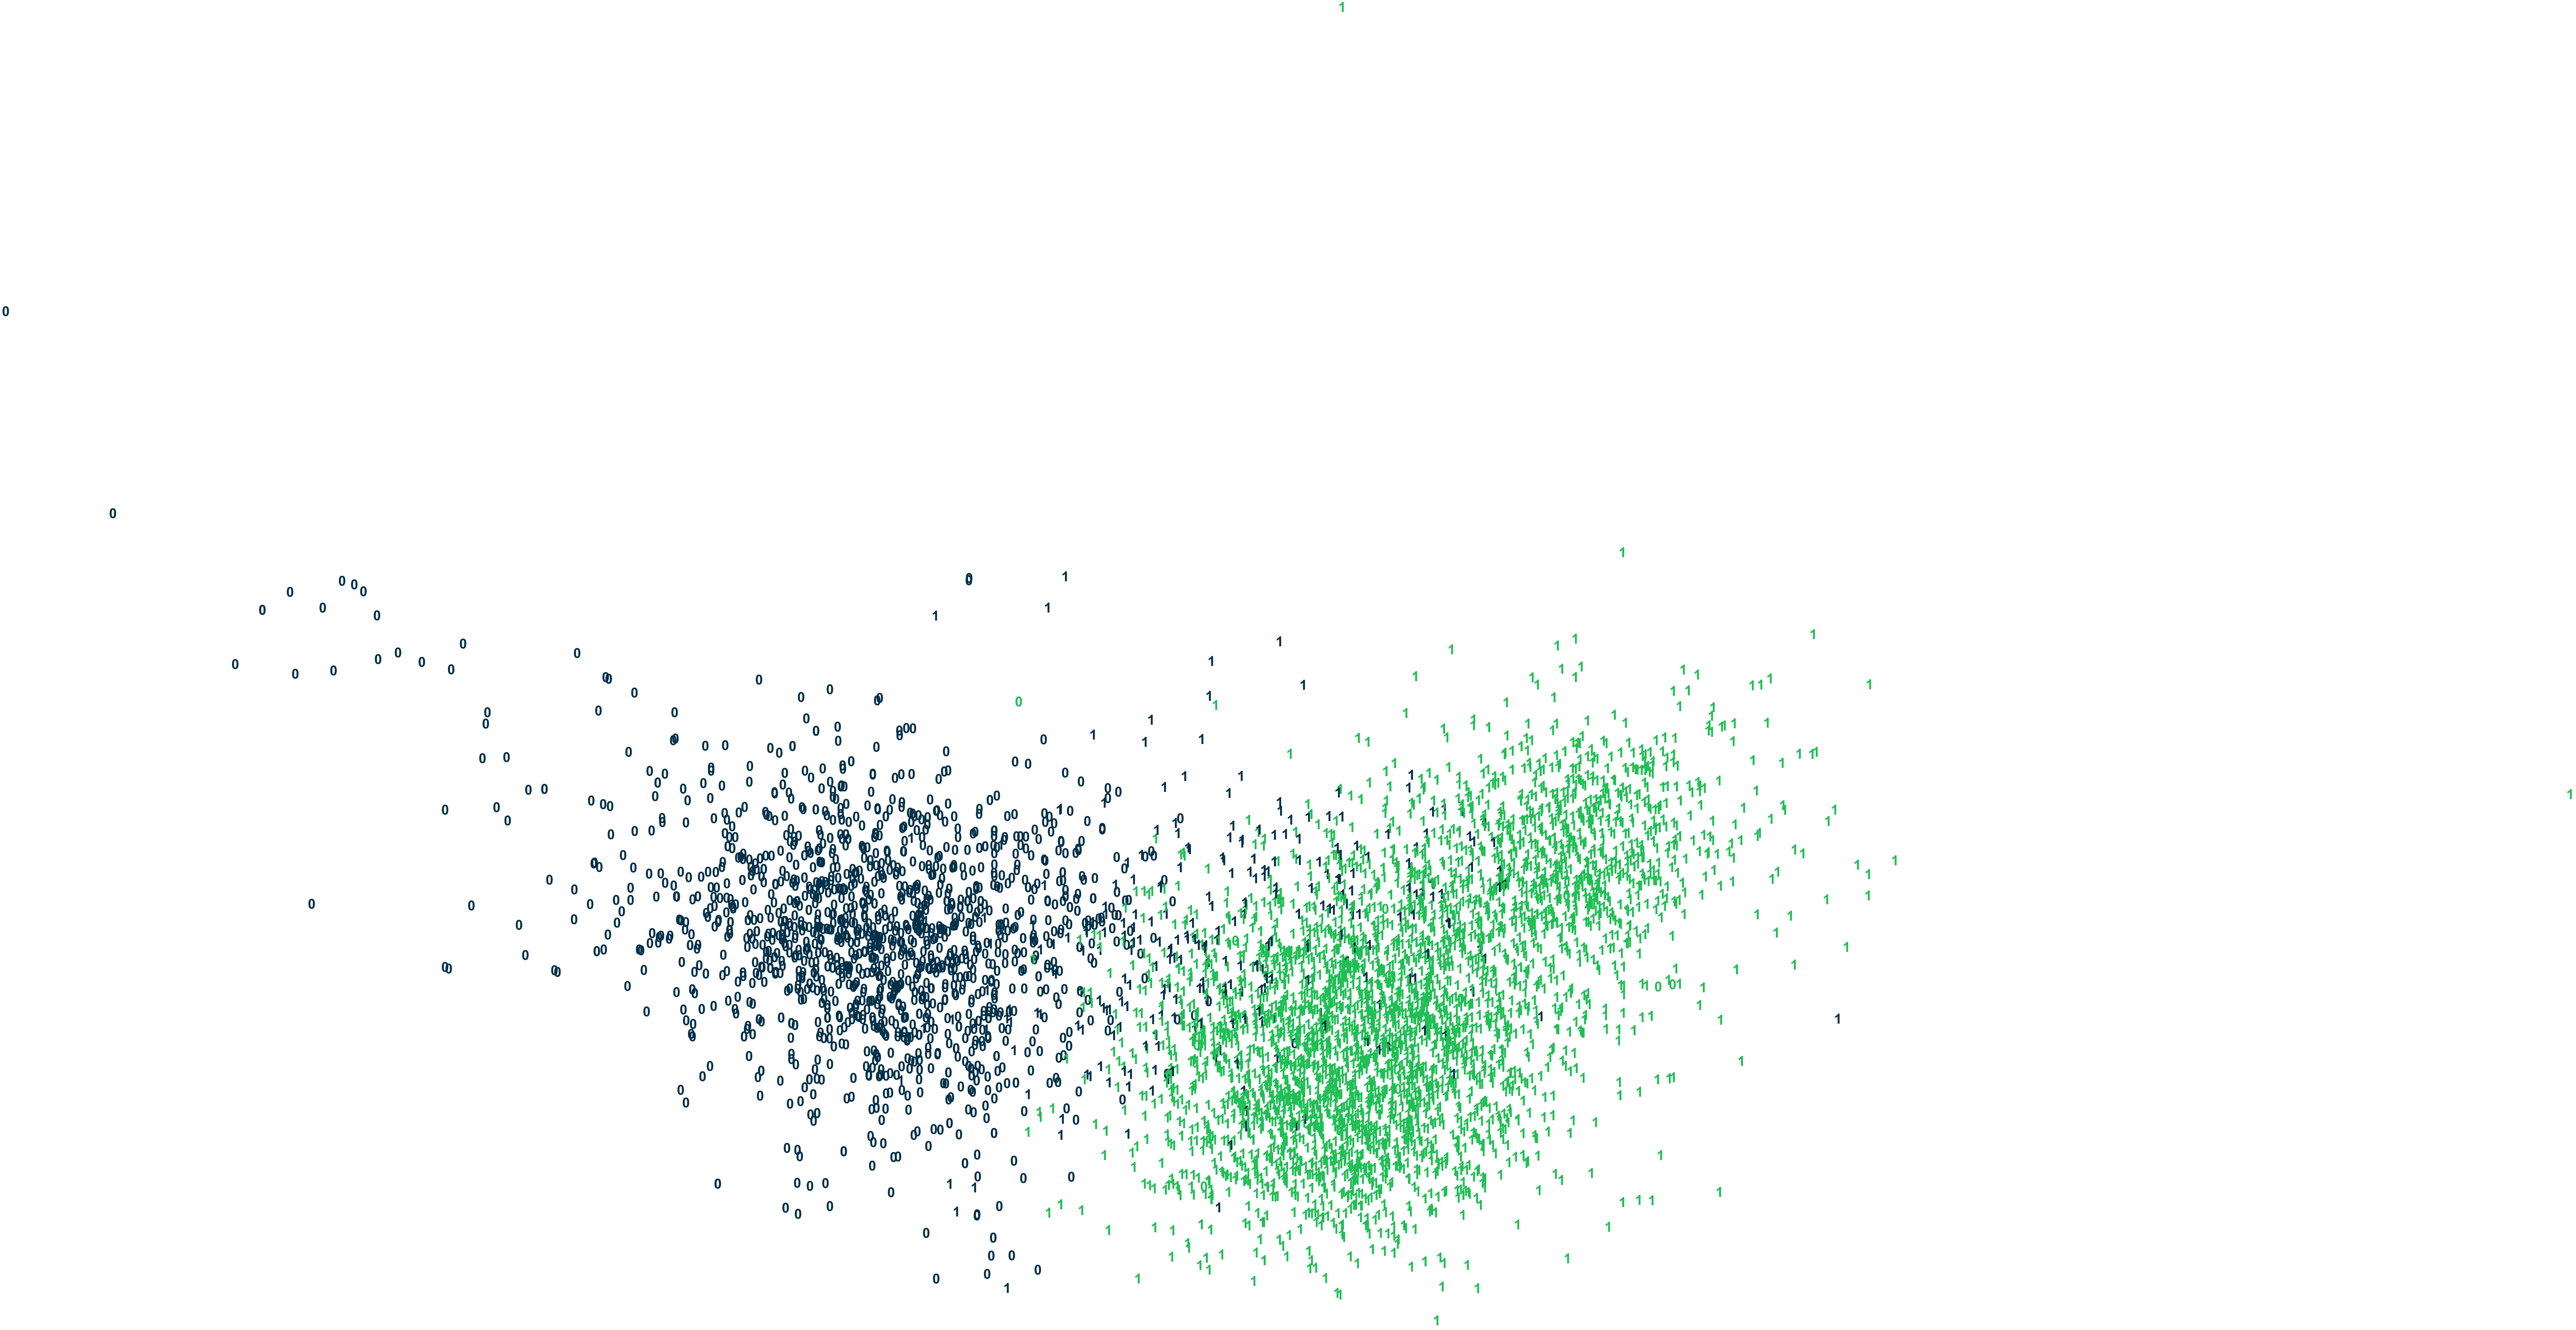

In [135]:
# GMM
gmm_clusters = GaussianMixture(n_components=2).fit_predict(X_std)


plt.figure(figsize=(10,5))
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(Y.values[i]),
             color=colors[gmm_clusters[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [100]:
print(f'Silhouette Score: {silhouette_score(X_norm,gmm_clusters, metric="euclidean")}')
print(f'ARI Score: {adjusted_rand_score(Y,gmm_clusters)}')

Silhouette Score: 0.23262304150785373
ARI Score: 0.7970745821983822


In [116]:
pd.crosstab(Y,gmm_clusters)

col_0     0     1
type             
0        13  1586
1      4579   319

The GMM model underperforms in comparison to the previous models

In summary our best performers were:

K Means
Silhouette Score: 0.25568536958165466
ARI Score: 0.9233952720291152
    

Hierarchy Pair: cosine, average
Silhouette Score: 0.2530117323271656
ARI Score: 0.9478297568280918


Hierarchy Pair: euclidean, ward
Silhouette Score: 0.23570107806081964
ARI Score: 0.9405539329287785

While the Hierarchical  model cosine/average does have the highest score, the heirarchical model ward seemed to provide the best dendrogram that would lead us to further inspection.